In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 파일 불러오기
df = pd.read_csv('knn_new_labels.csv')
df.drop(['Unnamed: 0' ,'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
df.info()

활성화 될 것으로 예상된 골목상권 추출

In [ ]:
sliced = df[(df['활성화_여부'] == 2) & (df['new_labels'] == 0) & (df['상권_구분_코드'] == 'A')]

In [ ]:
sliced

현재 활성화된 골목상권 추출

In [ ]:
zero = df[(df['활성화_여부'] == 0) & (df['상권_구분_코드'] == 'A')]

In [ ]:
zero

# 주요변수 평균값 비율 비교 시각화

주요변수 추출

In [ ]:
sliced_f = sliced[["분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수", "2021년_2030여성_비율평균","지하철_역_수","전체_카페_점포_수","개인카페_점포수"]]

In [ ]:
sliced_f

,분기당_매출_금액,분기당_매출_건수,"환산임대료(원, 21년도)",개인사업자_수,점포수,프랜차이즈_점포_수,2021년_2030여성_비율평균,지하철_역_수,전체_카페_점포_수,개인카페_점포수
403,5.468560e+08,39024.967740,141341.0,119.0,481.0,8.0,0.0368,0.0,43.0,41.0
404,1.381750e+09,105641.687500,106227.0,356.0,1155.0,64.0,0.0432,1.0,42.0,40.0
405,9.429684e+08,54663.483870,87958.0,199.0,561.0,40.0,0.0497,0.0,39.0,39.0
408,6.907679e+08,39505.156250,103072.0,203.0,894.0,32.0,0.0412,1.0,34.0,33.0
409,5.010255e+08,29753.193550,119009.0,538.0,972.0,102.0,0.0650,2.0,33.0,33.0
412,1.133859e+09,139346.903200,139716.0,370.0,1246.0,114.0,0.0564,1.0,41.0,31.0
416,4.409551e+08,33820.625000,108204.0,182.0,520.0,21.0,0.0480,0.0,31.0,29.0
421,5.191764e+08,35760.861110,111346.0,160.0,368.0,26.0,0.0421,0.0,29.0,26.0
422,4.888109e+08,25298.862070,106517.0,317.0,763.0,41.0,0.0414,0.0,29.0,26.0
575,1.228285e+08,9082.333333,131608.0,138.0,1101.0,9.0,0.0646,0.0,12.0,11.0


In [ ]:
zero_f = zero[["분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수", "2021년_2030여성_비율평균","지하철_역_수","전체_카페_점포_수","개인카페_점포수"]]

In [ ]:
zero_f

변수 별 평균 구한 후 리스트 생성

In [ ]:
sliced_lst = sliced_f.mean().tolist()
sliced_lst

In [ ]:
zero_lst = zero_f.mean().tolist()
zero_lst

위 두 리스트로 시각화 생성 위한 데이터프레임 생성

In [ ]:
df = pd.concat([zero_f.mean(),sliced_f.mean()], axis=1)

In [ ]:
df

,0,1
분기당_매출_금액,7.778394e+08,6.768998e+08
분기당_매출_건수,5.783070e+04,5.118981e+04
"환산임대료(원, 21년도)",1.258734e+05,1.154998e+05
개인사업자_수,6.113571e+02,2.582000e+02
점포수,1.205714e+03,8.061000e+02
프랜차이즈_점포_수,9.050000e+01,4.570000e+01
2021년_2030여성_비율평균,5.752143e-02,4.884000e-02
지하철_역_수,1.071429e+00,5.000000e-01
전체_카페_점포_수,5.078571e+01,3.330000e+01
개인카페_점포수,4.514286e+01,3.090000e+01


두 그룹 간 주요 변수 평균값 비율 생성

In [ ]:
df['0_1비율'] = df[1] / df[0]

In [ ]:
df

,0,1,0_1비율
분기당_매출_금액,7.778394e+08,6.768998e+08,0.870231
분기당_매출_건수,5.783070e+04,5.118981e+04,0.885167
"환산임대료(원, 21년도)",1.258734e+05,1.154998e+05,0.917587
개인사업자_수,6.113571e+02,2.582000e+02,0.422339
점포수,1.205714e+03,8.061000e+02,0.668566
프랜차이즈_점포_수,9.050000e+01,4.570000e+01,0.504972
2021년_2030여성_비율평균,5.752143e-02,4.884000e-02,0.849075
지하철_역_수,1.071429e+00,5.000000e-01,0.466667
전체_카페_점포_수,5.078571e+01,3.330000e+01,0.655696
개인카페_점포수,4.514286e+01,3.090000e+01,0.684494


In [ ]:
df['0_1비율'].tolist()

[0.8702307000323121,
 0.8851667147442335,
 0.9175868275841719,
 0.4223390583012034,
 0.6685663507109004,
 0.5049723756906077,
 0.849074878927108,
 0.4666666666666667,
 0.6556962025316455,
 0.6844936708860758]

시각자료 생성

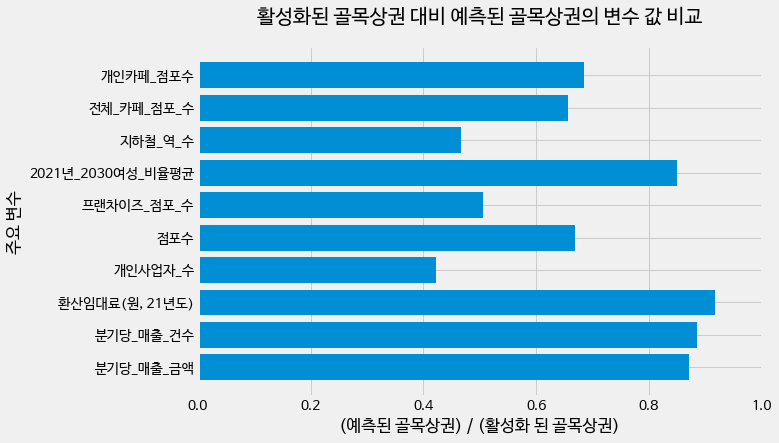

In [ ]:
# plt.rcParams.update({'figure.autolayout': True})

plt.rc('font', family='NanumBarunGothic')
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 6))
ax.barh(zero_f.columns, df['0_1비율'].tolist())
ax.set(xlim=[0, 1], xlabel='(예측된 골목상권) / (활성화 된 골목상권)', ylabel='주요 변수',
       title='활성화된 골목상권 대비 예측된 골목상권의 변수 값 비교')

ax.title.set(y=1.05)
#ax.set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 문화시설 수 비교 시각화

In [4]:
# 파일 불러오기
df1 = pd.read_csv('knn_new_labels.csv')
del df1['Unnamed: 0.1']
del df1['Unnamed: 0']

FileNotFoundError: ignored

In [ ]:
#기존 2그룹에서 0그룹으로 예측된 골목상권만 분류
sliced = df1[(df1['활성화_여부'] == 2) & (df1['new_labels'] == 0) & (df1['상권_구분_코드'] == 'A')]

In [ ]:
#분류된 프레임에서 '문화시설수'의 합계 저장
sum_2to0 = sliced['문화시설수'].sum()

In [ ]:
#기존 0그룹인 골목상권만 분류
zero = df1[(df1['활성화_여부'] == 0) & (df1['상권_구분_코드'] == 'A')]

In [ ]:
#중복 행정동 식별
zero['행정동명'].value_counts()

In [ ]:
#해당 행정동의 문화시설수 식별
zero[zero['행정동명'] == '서교동']['문화시설수']

In [ ]:
#기존 0그룹의 '문화시설수'합계 출력
#중복된 동의 '문화시설수' 만큼 합계에서 제거
sum_0 = zero['문화시설수'].sum() - 36

In [ ]:
#자료형 변환
sum_2to0 = int(sum_2to0)
sum_0 = int(sum_0)

In [ ]:
#해당 수치로 시각화
plt.figure(figsize=(10,7))
plt.xlabel("골목상권",size=20)
plt.ylabel("문화시설 총합", size=20)
plt.title("<그룹별 주요 문화시설 개수 총합 비교>",size=30, pad = 20)

x = ['기존 활성화 상권', '활성화 예측 상권']
values = [sum_0, sum_2to0]
colors = ['dodgerblue', 'navy']
bar = plt.bar(x, values, color = colors)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 15)

plt.grid(alpha=0.5)
plt.xticks(size = 16)
plt.yticks(size = 16)


plt.show()